<a id='intro'></a>
## Introduction

### Dataset Description 

In this project, I'll be analysis data the IMDB database containing data of different movies, genres, directors, revenue etc. My focus will particularly be on finding out if high revenue movies are on average more well recevied


### Question(s) for Analysis




# Project: IMDB Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [63]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [64]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [65]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

In [66]:
df.shape

(10866, 21)

In [67]:
df.describe()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

                  id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.8129

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning

 

In [81]:
df.drop(['id','imdb_id','popularity','cast','homepage','director','tagline','keywords','overview','runtime','genres','release_date','production_companies','release_year','budget_adj','revenue_adj'],axis=1, inplace=True)
df.head()

KeyError: "['id' 'imdb_id' 'popularity' 'cast' 'homepage' 'director' 'tagline'\n 'keywords' 'overview' 'runtime' 'genres' 'release_date'\n 'production_companies' 'release_year' 'budget_adj' 'revenue_adj'] not found in axis"

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.hist(figsize(15,5));

In [90]:
#get all the rows with 0 rev and 0 ratings
zeros = df.loc[df['revenue']==0]
zeros.info()
zero_rating =df.loc[df['vote_average']==0]
zero_rating.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 4 columns):
revenue           0 non-null float64
original_title    0 non-null object
vote_count        0 non-null int64
vote_average      0 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 0.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 4 columns):
revenue           0 non-null float64
original_title    0 non-null object
vote_count        0 non-null int64
vote_average      0 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 0.0+ bytes


In [92]:
#I noticed theres are 6000+ rows with 0 revenue and decided to remove those and work with the rest of the data
df['revenue'] = df['revenue'].replace(0,np.NaN)
df.dropna(subset=['revenue'],inplace=True)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4850 entries, 0 to 10848
Data columns (total 4 columns):
revenue           4850 non-null float64
original_title    4850 non-null object
vote_count        4850 non-null int64
vote_average      4850 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 189.5+ KB


TypeError: __init__() got an unexpected keyword argument 'max_rows'

            revenue   vote_count  vote_average
count  4.850000e+03  4850.000000   4850.000000
mean   8.922066e+07   436.215876      6.148763
std    1.620684e+08   806.416200      0.798795
min    2.000000e+00    10.000000      2.100000
25%    7.708081e+06    46.000000      5.600000
50%    3.182654e+07   147.000000      6.200000
75%    9.991823e+07   435.000000      6.700000
max    2.781506e+09  9767.000000      8.400000

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Replace this header name!)

In [ ]:
Which movie has the highest voting average?
Which movie had the lowest voting average?
Whcih move had the highest revenue?
Which movie had the lowest revenue?


In [85]:
#Movie with the highest voting average?
df.loc[df['vote_average'].idxmax()]

revenue                        2.83415e+07
original_title    The Shawshank Redemption
vote_count                            5754
vote_average                           8.4
Name: 4178, dtype: object

In [86]:
#Movie with the lowest voting average?
df.loc[df['vote_average'].idxmin()]

revenue                            9.10932e+06
original_title    Superbabies: Baby Geniuses 2
vote_count                                  11
vote_average                               2.1
Name: 7220, dtype: object

In [87]:
#Movie with the highest revenue?
df.loc[df['revenue'].idxmax()]

revenue           2.78151e+09
original_title         Avatar
vote_count               8458
vote_average              7.1
Name: 1386, dtype: object

In [88]:
#Movie with the lowest revenue?
df.loc[df['revenue'].idxmin()]

revenue                         2
original_title    Shattered Glass
vote_count                     46
vote_average                  6.4
Name: 5067, dtype: object

In [91]:
low_votes = df.loc[df['vote_count']<100]
low_votes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 72 to 10848
Data columns (total 4 columns):
revenue           1991 non-null float64
original_title    1991 non-null object
vote_count        1991 non-null int64
vote_average      1991 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 77.8+ KB


### Research Question 2  (Replace this header name!)

In [ ]:
Is there a relationship between no of voters and voting average?

Do high revenue movies get more voters?
Does the number of voters skew the voting score average?
Is There a relationshiop between revenue and rating?

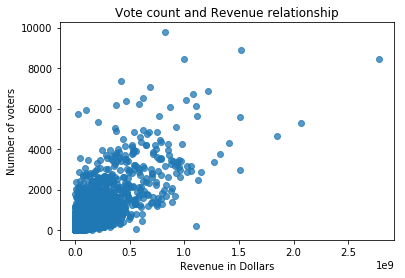

In [97]:
#Is there a relationship between no of voters and voting average?
# x-axis
plt.xlabel('Revenue in Dollars')
# y-axis
plt.ylabel('Number of voters')
# Title of the histogram
plt.title('Vote count and Revenue relationship')
plt.scatter(df['revenue'], df['vote_count'], alpha=0.75)
plt.show()

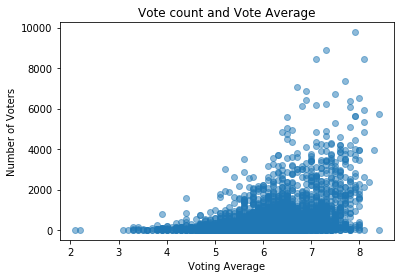

In [99]:
# x-axis
plt.xlabel('Voting Average')
# y-axis
plt.ylabel('Number of Voters')
# Title of the histogram
plt.title('Vote count and Vote Average')
plt.scatter(df['vote_average'], df['vote_count'], alpha=0.5)
plt.show()

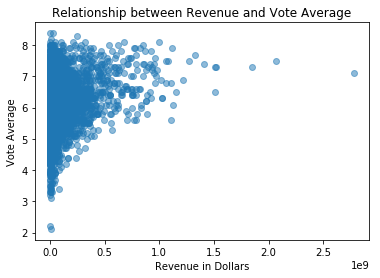

In [102]:
# x-axis
plt.xlabel('Revenue in Dollars')
# y-axis
plt.ylabel('Vote Average')
# Title of the histogram
plt.title('Relationship between Revenue and Vote Average')
plt.scatter(df['revenue'], df['vote_average'], alpha=0.5)
plt.show()

In [121]:
#Do movies with high revenue have high vote average?
high_rev_movies = df.sort_values(['revenue'], ascending=False)
high_rev_movies.head(10).describe()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

            revenue   vote_count  vote_average
count  1.000000e+01    10.000000     10.000000
mean   1.645657e+09  5412.100000      7.250000
std    4.764679e+08  2067.675638      0.343996
min    1.215440e+09  2947.000000      6.500000
25%    1.347122e+09  3888.500000      7.150000
50%    1.509889e+09  4973.000000      7.300000
75%    1.763665e+09  6552.000000      7.475000
max    2.781506e+09  8903.000000      7.700000

In [123]:
#average rating of the 100 highest grossing movies
high_rev_movies.head(100).describe()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

            revenue   vote_count  vote_average
count  1.000000e+02   100.000000    100.000000
mean   8.979584e+08  3475.060000      6.909000
std    3.189943e+08  1839.603382      0.651199
min    6.118994e+08   201.000000      5.600000
25%    7.097980e+08  2245.750000      6.400000
50%    8.079637e+08  3169.500000      6.950000
75%    9.590500e+08  4266.000000      7.400000
max    2.781506e+09  9767.000000      8.100000

In [119]:
#Do movies with low revenue have high vote average?
low_rev_movies = df.sort_values(['revenue'], ascending=True)
low_rev_movies.head(10).describe()



TypeError: __init__() got an unexpected keyword argument 'max_rows'

         revenue  vote_count  vote_average
count  10.000000   10.000000     10.000000
mean    4.400000   64.500000      6.180000
std     2.221111   66.750364      1.011929
min     2.000000   10.000000      4.500000
25%     3.000000   15.250000      5.400000
50%     4.000000   36.500000      6.500000
75%     5.750000  106.000000      6.775000
max     9.000000  201.000000      7.700000

In [118]:
#average rating of the 100 lowest grossing movies
low_rev_movies.head(100).describe()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

            revenue  vote_count  vote_average
count    100.000000  100.000000    100.000000
mean    2975.290000   64.180000      5.696000
std     3491.009496  105.271979      0.849233
min        2.000000   10.000000      3.200000
25%       22.250000   16.000000      5.175000
50%      756.500000   28.000000      5.700000
75%     6093.000000   60.750000      6.300000
max    10967.000000  753.000000      7.700000

<a id='conclusions'></a>
## Conclusions
Based on the findings

The higher the revenue of a movie, the more people voted on its rating
The more people voted on a movie the higher the average rating of that movie 
The higher the revenue of a movie, the higher the average rating of that movie. 
The average rating of the top 10 grossing movies was: 7.250000 with an average vote count of 5412.1 people, and not 
    much deviation from the mean
The average rating of the 10 least grossing movies was: 6.180000 with an average vote count of 65 people

The average rating of the 100 least grossing movies was: 5.696000
The average rating of the 100 highest grossing movies was: 6.9090

I can conclude that Revenue has an overall positive effect on movie ratings, but i'd also like to investigate the effects of directors, genres, possibly year of viewing on veiwer ratings of movies. 


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0